<a href="https://colab.research.google.com/github/codekali/Neural-SC-Desciptor/blob/master/firstTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import torch
import json
from torch.utils.data import Dataset
dictionary={}
X,Y = [],[]
count=-1   
file=open("/content/drive/My Drive/Transformer/train/train.token.sbt")
for line in file:
  X.append(line)
  count+=1
count=0
file=open("/content/drive/My Drive/Transformer/train/train.token.nl")
for line in file:
  Y.append(line)
  count+=1
print(len(Y))
print(len(X))
X=X[0:100]
Y=Y[0:100]

445812
445812


In [52]:
# You can even put this data load operation in your Dataset class
import torch
import json
from torch.utils.data import Dataset
dictionary={}
X_valid,Y_valid = [],[]
count=-1   
file=open("/content/drive/My Drive/Transformer/val/valid.token.sbt")
for line in file:
  X_valid.append(line)
  count+=1
count=0
file=open("/content/drive/My Drive/Transformer/val/valid.token.nl")
for line in file:
  Y_valid.append(line)
  count+=1
print(len(Y_valid))
print(len(X_valid))
X_valid=X_valid[0:20]
Y_valid=Y_valid[0:20]

20000
20000


In [0]:
print(len(Y))
print(len(X))

In [0]:
import torch
from torch.utils import data

class Dataset(data.Dataset):
  def __init__(self, X_item, Y_item):
    self.X_item=X_item
    self.Y_item=Y_item

  def __len__(self):
    return len(self.X_item)

  def __getitem__(self, index):
    X = self.X_item[index]
    
    Y = self.Y_item[index]
    return X, Y

In [54]:
#import mydata
import torch
from torch.utils import data
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
params = {'batch_size': 5,
          'shuffle': True,
          'num_workers': 6}
max_epochs = 10

training_set = Dataset(X,Y)
training_generator = data.DataLoader(training_set, **params)

validation_set = Dataset(X_valid,Y_valid)
validation_generator = data.DataLoader(validation_set, **params)

cuda


In [0]:
!pip install transformers


Epoch  0  completed!, Training LOSS is:  tensor(3.2990, device='cuda:0', grad_fn=<NllLossBackward>)  Validation loss is:  tensor(33.8064, device='cuda:0')

Epoch  1  completed!, Training LOSS is:  tensor(4.0996, device='cuda:0', grad_fn=<NllLossBackward>)  Validation loss is:  tensor(38.8854, device='cuda:0')

Epoch  2  completed!, Training LOSS is:  tensor(2.8176, device='cuda:0', grad_fn=<NllLossBackward>)  Validation loss is:  tensor(13.5292, device='cuda:0')

Epoch  3  completed!, Training LOSS is:  tensor(3.5123, device='cuda:0', grad_fn=<NllLossBackward>)  Validation loss is:  tensor(18.1840, device='cuda:0')

Epoch  4  completed!, Training LOSS is:  tensor(3.5333, device='cuda:0', grad_fn=<NllLossBackward>)  Validation loss is:  tensor(32.9379, device='cuda:0')

Epoch  5  completed!, Training LOSS is:  tensor(2.5911, device='cuda:0', grad_fn=<NllLossBackward>)  Validation loss is:  tensor(18.0464, device='cuda:0')

Epoch  6  completed!, Training LOSS is:  tensor(2.6745, device=

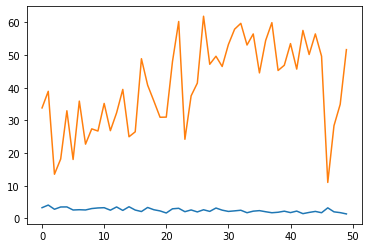

In [56]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch.optim as optim
import matplotlib.pyplot as plt

tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')
model = model.to(device)
# optimizer should be defined outside training loop
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_train = []
loss_valid = []

for epoch in range(50):
    trainloss=0
    validloss=0
    # Training
    for local_batch, local_labels in training_generator: 
        optimizer.zero_grad()
        """Forward Function Implementation"""
        # Also, put the encode function in dataset. Return encoded matrix values from dataset. Here, only take it to gpu.
        input_ids = tokenizer.batch_encode_plus(local_batch, return_tensors="pt",pad_to_max_length=True)
        label = tokenizer.batch_encode_plus(local_labels, return_tensors="pt",pad_to_max_length=True)
        outputs = model(input_ids=(input_ids['input_ids']).to(device), lm_labels=(label['input_ids']).to(device),attention_mask=(input_ids['attention_mask']).to(device))
        loss, prediction_scores = outputs[:2]
        trainloss=loss
        """Forward Function Ends here"""
        """Loss and optimizer"""
        loss.backward()
        optimizer.step()
    loss_train.append(trainloss)


    """Validation"""
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
          input_ids = tokenizer.batch_encode_plus(local_batch, return_tensors="pt",pad_to_max_length=True)
          label = tokenizer.batch_encode_plus(local_labels, return_tensors="pt",pad_to_max_length=True)
          model.eval()
          outputs = model(input_ids=(input_ids['input_ids']).to(device), lm_labels=(label['input_ids']).to(device))
          loss, prediction_scores = outputs[:2]
          validloss=loss
    loss_valid.append(validloss)
    print("\nEpoch ", epoch, " completed!, Training LOSS is: ", trainloss, " Validation loss is: ", validloss)
plt.plot(loss_train)
plt.plot(loss_valid)
    #print(loss, "\n\n")


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
 model.eval()

In [59]:
temp_index=50 
ip=tokenizer.encode(X[temp_index], return_tensors="pt")
op=model.generate(input_ids=ip.to(device))
print(tokenizer.decode(op[0]))
print(X[temp_index])
print(Y[temp_index])

creates an instance of the factory.
( ConstructorDeclaration ( StatementExpression ( SuperConstructorInvocation ) SuperConstructorInvocation ) StatementExpression ) ConstructorDeclaration

creates an instance of the factory .



In [0]:
from datetime import datetime as dt
runtime =  dt.now()
model_name = "/content/drive/My Drive/Transformer/models/" + runtime.strftime("%d:%m:%Y:%H:%M") + ".pth"

torch.save(model.state_dict(), model_name)